In [1]:
#Import statments and plot figures inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Global variables to define ranges between segments

NEVER_ORGANIC_MAX = 0.1
MID = 0.5
SUPER_ORGANIC_MIN = 0.9

In [3]:
# Read in the produce dataset and drop the column of index from the previous table (no longer valid indices)
organic = pd.read_csv('produce_dataset.csv').drop('Unnamed: 0', axis =1)

# Initialize a total_produce_purchased column with all 1's 
organic['total_produce_purchased'] = 1

# Create a organic? column containing 1 for an organic produce, 0 for a non-organic produce
organic['organic?'] = organic['product_name'].str.contains('Organic').astype(int)

In [4]:
organic

,user_id,order_number,order_id,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,add_to_cart_order,reordered,aisle_id,aisle,total_produce_purchased,organic?
0,1,2,2398795,3,7,15.0,13176,Bag of Organic Bananas,4,0,24,fresh fruits,1,1
1,1,5,431534,4,15,28.0,10326,Organic Fuji Apples,5,0,24,fresh fruits,1,1
2,1,5,431534,4,15,28.0,17122,Honeycrisp Apples,6,0,24,fresh fruits,1,0
3,1,5,431534,4,15,28.0,41787,Bartlett Pears,7,0,24,fresh fruits,1,0
4,1,5,431534,4,15,28.0,13176,Bag of Organic Bananas,8,1,24,fresh fruits,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888373,206209,12,626363,1,12,18.0,43961,Organic Peeled Whole Baby Carrots,10,1,123,packaged vegetables fruits,1,1
9888374,206209,12,626363,1,12,18.0,5622,Cocktail Tomatoes on the Vine,18,0,123,packaged vegetables fruits,1,0
9888375,206209,12,626363,1,12,18.0,14727,Yellow Onion,20,0,123,packaged vegetables fruits,1,0
9888376,206209,13,2977660,1,12,7.0,24852,Banana,1,1,24,fresh fruits,1,0


## QUESTION 3
Is "buying organic" a stable or dynamic behavior?

In [5]:
# Create series data for produce per order and organic produce per order

produce_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['total_produce_purchased'].sum()
organic_per_order = organic.groupby(['user_id', 'order_number', 'order_id'])['organic?'].sum()

In [6]:
produce_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      4
2        1             2168274     4
         2             1501582     2
         3             1901567     1
                                  ..
206209   10            2266710     1
         11            1854736     1
         12            626363      5
         13            2977660     1
         14            272231      1
Name: total_produce_purchased, Length: 2506247, dtype: int64

In [7]:
organic_per_order

user_id  order_number  order_id
1        2             2398795     1
         5             431534      2
2        1             2168274     3
         2             1501582     1
         3             1901567     1
                                  ..
206209   10            2266710     0
         11            1854736     0
         12            626363      1
         13            2977660     0
         14            272231      0
Name: organic?, Length: 2506247, dtype: int64

In [8]:
# Combine the series into a new dataset called user_behavior
user_behavior = pd.concat([produce_per_order, organic_per_order], axis=1).reset_index()

# Rename the organic? column
user_behavior.rename(columns = {'organic?':'organic_produce_purchased'}, inplace = True) 

# Create a new column of total order count for a user
user_behavior['order_count'] = user_behavior.groupby('user_id').user_id.transform('count')

user_behavior.head(15)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
0,1,2,2398795,1,1,2
1,1,5,431534,4,2,2
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15


count    194331.000000
mean         12.896795
std          14.421578
min           1.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         100.000000
Name: order_count, dtype: float64

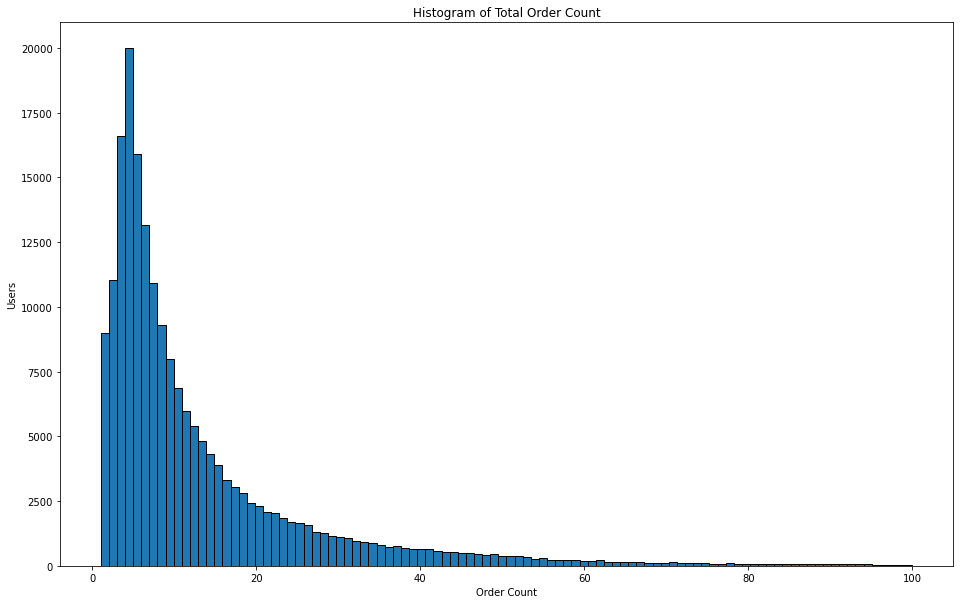

In [9]:
# Plot the count of users who had up to x number of orders

plt.figure(figsize=(16,10))

plt.hist(user_behavior.drop_duplicates(subset=['user_id'])['order_count'], bins = 100, edgecolor = 'black')

plt.title('Histogram of Total Order Count')
plt.xlabel('Order Count')
plt.ylabel('Users')
pass

# Describe the stats of the order_count
user_behavior.drop_duplicates(subset=['user_id'])['order_count'].describe()

In [10]:
# Drop the users who had less than 10 orders
user_behavior10 = user_behavior.drop(user_behavior[user_behavior['order_count'] < 10].index, axis=0)
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
...,...,...,...,...,...,...
2506242,206209,10,2266710,1,0,11
2506243,206209,11,1854736,1,0,11
2506244,206209,12,626363,5,1,11
2506245,206209,13,2977660,1,0,11


In [11]:
# Re-assign the order_number column to be sequential from 1 to final order number per user
user_behavior10['order_number'] = user_behavior10.groupby('user_id').cumcount() + 1

# Check to make sure each first order number is 1
print(user_behavior10.drop_duplicates(subset=['user_id'])['order_number'].unique())

user_behavior10.head(15)

[1]


,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count
2,2,1,2168274,4,3,15
3,2,2,1501582,2,1,15
4,2,3,1901567,1,1,15
5,2,4,738281,3,2,15
6,2,5,1673511,1,1,15
7,2,6,1199898,5,2,15
8,2,7,3194192,4,1,15
9,2,8,788338,3,1,15
10,2,9,1718559,2,0,15
11,2,10,1447487,2,1,15


In [12]:
# Create a new 'organic_%' column that is the percentage of organic produce purchased over total produce purchased

user_behavior10['organic_%'] = user_behavior10['organic_produce_purchased']/user_behavior10['total_produce_purchased']
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%
2,2,1,2168274,4,3,15,0.750000
3,2,2,1501582,2,1,15,0.500000
4,2,3,1901567,1,1,15,1.000000
5,2,4,738281,3,2,15,0.666667
6,2,5,1673511,1,1,15,1.000000
...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000
2506243,206209,8,1854736,1,0,11,0.000000
2506244,206209,9,626363,5,1,11,0.200000
2506245,206209,10,2977660,1,0,11,0.000000


In [13]:
# Create dataframes for simple moving average (window=5) of total produce and organic produce
total_SMA = user_behavior10.groupby('user_id')['total_produce_purchased'].rolling(window=5).sum().reset_index(level=[0,1])
total_SMA.set_index('level_1', inplace=True)
total_SMA.drop('user_id', axis = 1, inplace=True)

organic_SMA = user_behavior10.groupby('user_id')['organic_produce_purchased'].rolling(window=5).sum().reset_index(level=[0,1])
organic_SMA.set_index('level_1', inplace=True)
organic_SMA.drop('user_id',  axis = 1, inplace=True)

In [14]:
# Create a dataframe with the simple moving average over 5 rows per user
df_SMA = (organic_SMA['organic_produce_purchased']/total_SMA['total_produce_purchased']).to_frame().rename(columns = {0:'organic_%_SMA5'})
df_SMA

,organic_%_SMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.727273
...,...
2506242,0.750000
2506243,0.625000
2506244,0.400000


In [15]:
# Create dataframes for CMA of total produce and organic produce
total_CMA = user_behavior10.groupby('user_id')['total_produce_purchased'].expanding(min_periods=5).sum().reset_index(level=[0,1])
total_CMA.set_index('level_1', inplace=True)
total_CMA.drop('user_id', axis = 1, inplace=True)

organic_CMA = user_behavior10.groupby('user_id')['organic_produce_purchased'].expanding(min_periods=5).sum().reset_index(level=[0,1])
organic_CMA.set_index('level_1', inplace=True)
organic_CMA.drop('user_id',  axis = 1, inplace=True)

In [16]:
# Create a dataframe with the simple moving average over 5 rows per user
df_CMA = (organic_CMA['organic_produce_purchased']/total_CMA['total_produce_purchased']).to_frame().rename(columns = {0:'organic_%_CMA5'})
df_CMA

,organic_%_CMA5
level_1,
2,NaN
3,NaN
4,NaN
5,NaN
6,0.727273
...,...
2506242,0.666667
2506243,0.615385
2506244,0.500000


In [17]:
# Join the SMA and CMA dataframes to the original dataframe
user_behavior10 = user_behavior10.join(df_SMA)
user_behavior10 = user_behavior10.join(df_CMA)

user_behavior10.head(15)

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5
2,2,1,2168274,4,3,15,0.750000,NaN,NaN
3,2,2,1501582,2,1,15,0.500000,NaN,NaN
4,2,3,1901567,1,1,15,1.000000,NaN,NaN
5,2,4,738281,3,2,15,0.666667,NaN,NaN
6,2,5,1673511,1,1,15,1.000000,0.727273,0.727273
7,2,6,1199898,5,2,15,0.400000,0.583333,0.625000
8,2,7,3194192,4,1,15,0.250000,0.500000,0.550000
9,2,8,788338,3,1,15,0.333333,0.437500,0.521739
10,2,9,1718559,2,0,15,0.000000,0.333333,0.480000
11,2,10,1447487,2,1,15,0.500000,0.312500,0.481481


In [18]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_SMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_SMA5'] < NEVER_ORGANIC_MAX, 'segment_SMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= NEVER_ORGANIC_MAX) & 
                    (user_behavior10['organic_%_SMA5'] < MID), 'segment_SMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_SMA5'] >= MID) & 
                    (user_behavior10['organic_%_SMA5'] < SUPER_ORGANIC_MIN), 'segment_SMA5'] = 'Moderate Organic'
user_behavior10.loc[user_behavior10['organic_%_SMA5'] >= SUPER_ORGANIC_MIN, 'segment_SMA5'] = 'Super Organic'

In [19]:
# Create a new 'segment' column and initialize it with NaN
user_behavior10['segment_CMA5'] = np.NaN

# Set up the customer segments per the percentage ranges below and assign the values to the 'segment' column
user_behavior10.loc[user_behavior10['organic_%_CMA5'] < NEVER_ORGANIC_MAX, 'segment_CMA5'] = 'Never Organic'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= NEVER_ORGANIC_MAX) & 
                    (user_behavior10['organic_%_CMA5'] < MID), 'segment_CMA5'] = 'Organic Taster'
user_behavior10.loc[(user_behavior10['organic_%_CMA5'] >= MID) & 
                    (user_behavior10['organic_%_CMA5'] < SUPER_ORGANIC_MIN), 'segment_CMA5'] = 'Moderate Organic'
user_behavior10.loc[user_behavior10['organic_%_CMA5'] >= SUPER_ORGANIC_MIN, 'segment_CMA5'] = 'Super Organic'

In [20]:
# Drop any leftover NaN values (there should not be any)
user_behavior10.dropna(inplace=True)
user_behavior10

,user_id,order_number,order_id,total_produce_purchased,organic_produce_purchased,order_count,organic_%,organic_%_SMA5,organic_%_CMA5,segment_SMA5,segment_CMA5
6,2,5,1673511,1,1,15,1.000000,0.727273,0.727273,Moderate Organic,Moderate Organic
7,2,6,1199898,5,2,15,0.400000,0.583333,0.625000,Moderate Organic,Moderate Organic
8,2,7,3194192,4,1,15,0.250000,0.500000,0.550000,Moderate Organic,Moderate Organic
9,2,8,788338,3,1,15,0.333333,0.437500,0.521739,Organic Taster,Moderate Organic
10,2,9,1718559,2,0,15,0.000000,0.333333,0.480000,Organic Taster,Organic Taster
...,...,...,...,...,...,...,...,...,...,...,...
2506242,206209,7,2266710,1,0,11,0.000000,0.750000,0.666667,Moderate Organic,Moderate Organic
2506243,206209,8,1854736,1,0,11,0.000000,0.625000,0.615385,Moderate Organic,Moderate Organic
2506244,206209,9,626363,5,1,11,0.200000,0.400000,0.500000,Organic Taster,Moderate Organic
2506245,206209,10,2977660,1,0,11,0.000000,0.300000,0.473684,Organic Taster,Organic Taster


In [21]:
# Create a new, clean dataset for plotting SMA5 data
plot_SMA5_df = user_behavior10.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()

# Create a new column that shows the percentage of users per segment per order
plot_SMA5_df['%_users'] = plot_SMA5_df.users.div(plot_SMA5_df.order_number.map(plot_SMA5_df.groupby('order_number').sum().users))

# Find the percentage change in users between each order number for the SMA segments
plot_SMA5_df['%_users_%_change'] = plot_SMA5_df.groupby('segment_SMA5')['%_users'].apply(lambda x: x.div(x.iloc[0]).subtract(1))

plot_SMA5_df.head(15)

,order_number,segment_SMA5,users,%_users,%_users_%_change
0,5,Moderate Organic,37361,0.464348,0.000000
1,5,Organic Taster,28025,0.348314,0.000000
2,5,Never Organic,8464,0.105196,0.000000
3,5,Super Organic,6609,0.082141,0.000000
4,6,Moderate Organic,37194,0.462273,-0.004470
5,6,Organic Taster,27956,0.347456,-0.002462
6,6,Never Organic,8621,0.107148,0.018549
7,6,Super Organic,6688,0.083123,0.011953
8,7,Moderate Organic,37128,0.461452,-0.006236
9,7,Organic Taster,27928,0.347108,-0.003461


In [22]:
# Create a new, clean dataset for plotting CMA5 data
plot_CMA5_df = user_behavior10.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Create a new column that shows the percentage of users per segment per order
plot_CMA5_df['%_users'] = plot_CMA5_df.users.div(plot_CMA5_df.order_number.map(plot_CMA5_df.groupby('order_number').sum().users))

# Find the percentage change in users between each order number for the CMA segments
plot_CMA5_df['%_users_%_change'] = plot_CMA5_df.groupby('segment_CMA5')['%_users'].apply(lambda x: x.div(x.iloc[0]).subtract(1))

plot_CMA5_df.head(15)

,order_number,segment_CMA5,users,%_users,%_users_%_change
0,5,Moderate Organic,37361,0.464348,0.000000
1,5,Organic Taster,28025,0.348314,0.000000
2,5,Never Organic,8464,0.105196,0.000000
3,5,Super Organic,6609,0.082141,0.000000
4,6,Moderate Organic,37613,0.467480,0.006745
5,6,Organic Taster,28402,0.353000,0.013452
6,6,Never Organic,8253,0.102574,-0.024929
7,6,Super Organic,6191,0.076946,-0.063247
8,7,Moderate Organic,37812,0.469954,0.012071
9,7,Organic Taster,28722,0.356977,0.024871


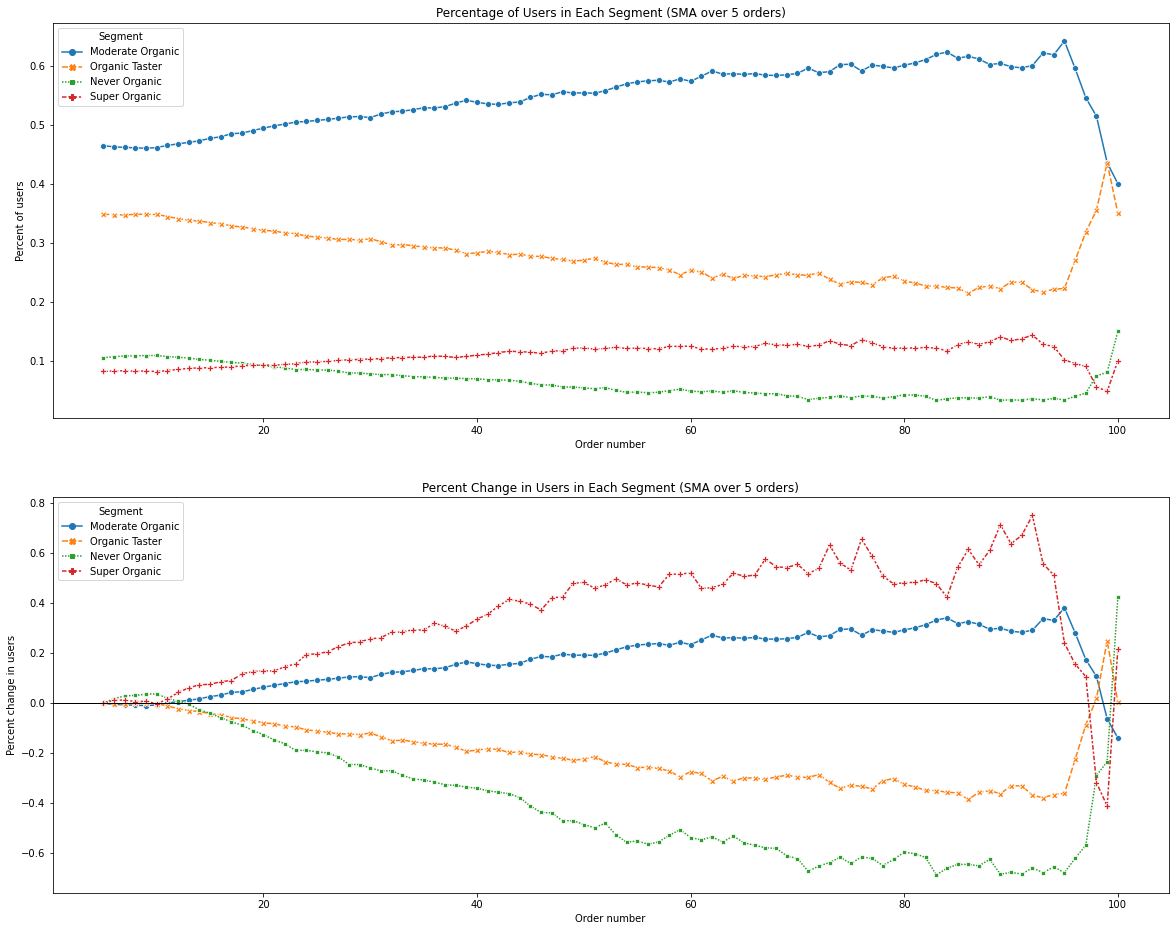

In [23]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(2,1, figsize = (20,16))

sns.lineplot(data=plot_SMA5_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax[0])

ax[0].legend(loc=2).set_title('Segment')

ax[0].set_xlabel('Order number')
ax[0].set_ylabel('Percent of users')
ax[0].set_title('Percentage of Users in Each Segment (SMA over 5 orders)')

# Plot the percentage change in users per order separated into the segments by a simple moving average

sns.lineplot(data=plot_SMA5_df, x="order_number", y = '%_users_%_change', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax[1])

ax[1].legend(loc=2).set_title('Segment')
ax[1].axhline(linewidth=1, color='black')
ax[1].set_xlabel('Order number')
ax[1].set_ylabel('Percent change in users')
ax[1].set_title('Percent Change in Users in Each Segment (SMA over 5 orders)')

pass

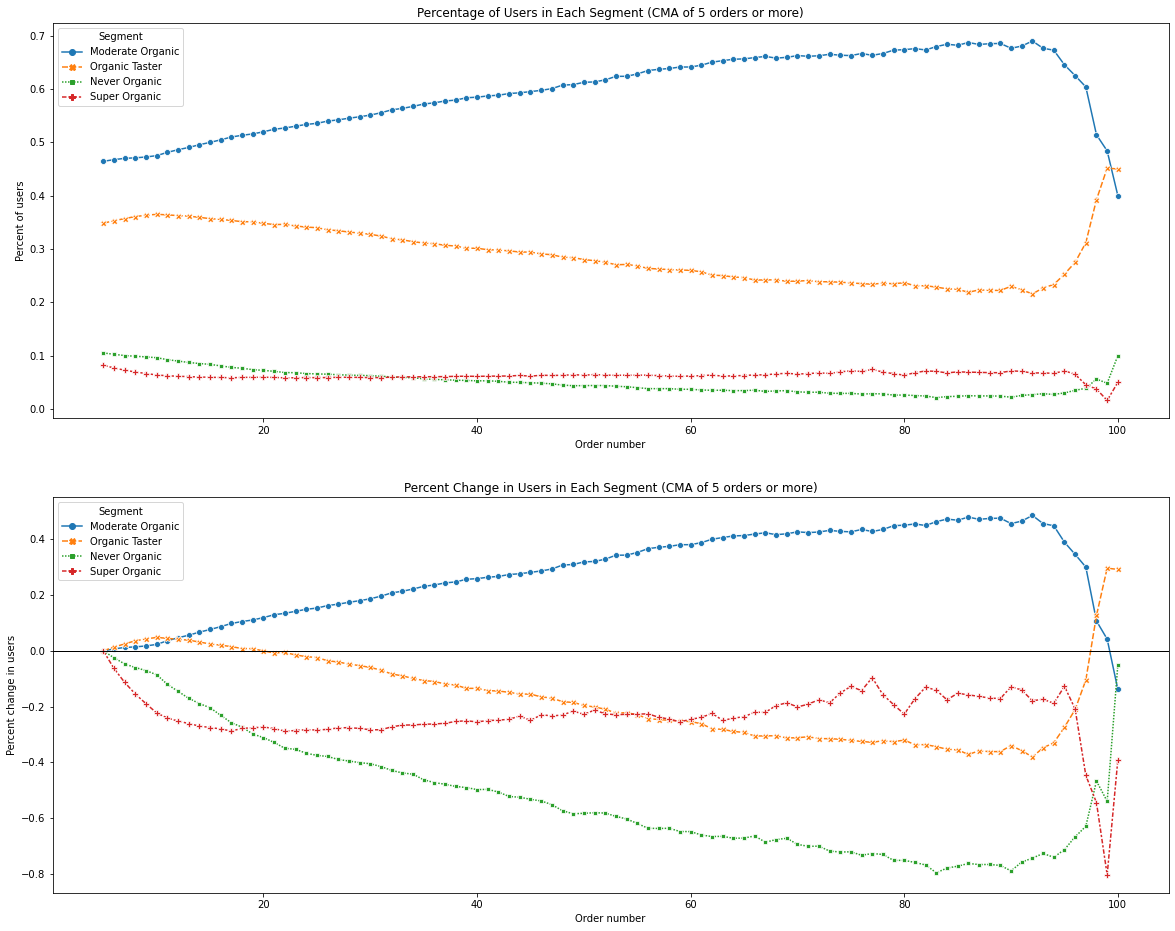

In [24]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average

fig, ax = plt.subplots(2,1, figsize = (20,16))

sns.lineplot(data=plot_CMA5_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax[0])

ax[0].legend().set_title('Segment')
ax[0].set_xlabel('Order number')
ax[0].set_ylabel('Percent of users')
ax[0].set_title('Percentage of Users in Each Segment (CMA of 5 orders or more)')

pass

# Plot the percentage change in users per order separated into the segments by a culmulative moving average

sns.lineplot(data=plot_CMA5_df, x="order_number", y = '%_users_%_change', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax[1])

ax[1].legend(loc=2).set_title('Segment')
ax[1].axhline(linewidth=1, color='black')
ax[1].set_xlabel('Order number')
ax[1].set_ylabel('Percent change in users')
ax[1].set_title('Percent Change in Users in Each Segment (CMA of 5 orders or more)')

pass

### Never Organic
What is the evolution of organic purchasing behavior of users who started off as Never Organic?

In [25]:
# Create a CMA dataset of users who started off as Never Organic (order_number = 5)

# List of users who started off as Never Organic given CMA
start_NO_CMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Never Organic')]['user_id'].tolist()
start_NO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(start_NO_CMA_list)]

# Create a clean dataframe for plotting
start_NO_CMA_plot_df = start_NO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_NO_CMA_plot_df['%_users'] = start_NO_CMA_plot_df.users.div(start_NO_CMA_plot_df.order_number.map(start_NO_CMA_plot_df.groupby('order_number').sum().users))

start_NO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Never Organic,8464,1.000000
1,6,Never Organic,7607,0.898748
2,6,Organic Taster,856,0.101134
3,6,Moderate Organic,1,0.000118
4,7,Never Organic,7154,0.845227
5,7,Organic Taster,1309,0.154655
6,7,Moderate Organic,1,0.000118
7,8,Never Organic,6865,0.811082
8,8,Organic Taster,1594,0.188327
9,8,Moderate Organic,5,0.000591


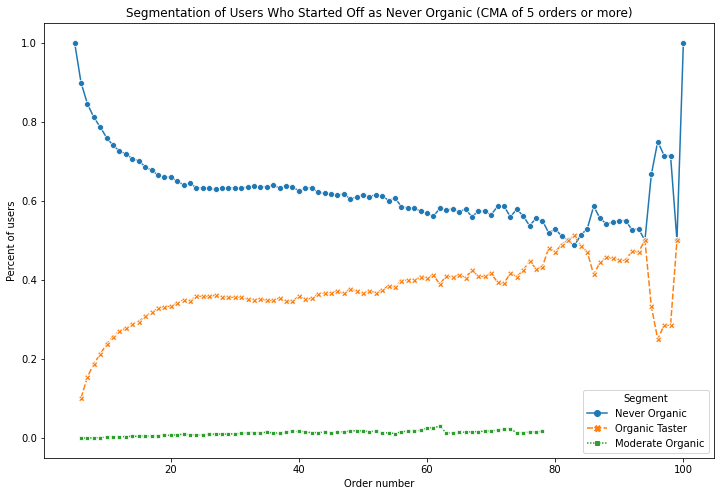

In [26]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_NO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Never Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

In [27]:
# Create a SMA dataset of users who started off as Never Organic (order_number = 5)

# List of users who started off as Never Organic given SMA
start_NO_SMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_SMA5'] == 'Never Organic')]['user_id'].tolist()

start_NO_SMA_df = user_behavior10[user_behavior10['user_id'].isin(start_NO_SMA_list)]

# Create a clean dataframe for plotting
start_NO_SMA_plot_df = start_NO_SMA_df.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_NO_SMA_plot_df['%_users'] = start_NO_SMA_plot_df.users.div(start_NO_SMA_plot_df.order_number.map(start_NO_SMA_plot_df.groupby('order_number').sum().users))

start_NO_SMA_plot_df.head(15)

,order_number,segment_SMA5,users,%_users
0,5,Never Organic,8464,1.000000
1,6,Never Organic,7360,0.869565
2,6,Organic Taster,1102,0.130198
3,6,Moderate Organic,2,0.000236
4,7,Never Organic,6686,0.789934
5,7,Organic Taster,1770,0.209121
6,7,Moderate Organic,8,0.000945
7,8,Never Organic,6147,0.726252
8,8,Organic Taster,2267,0.267840
9,8,Moderate Organic,50,0.005907


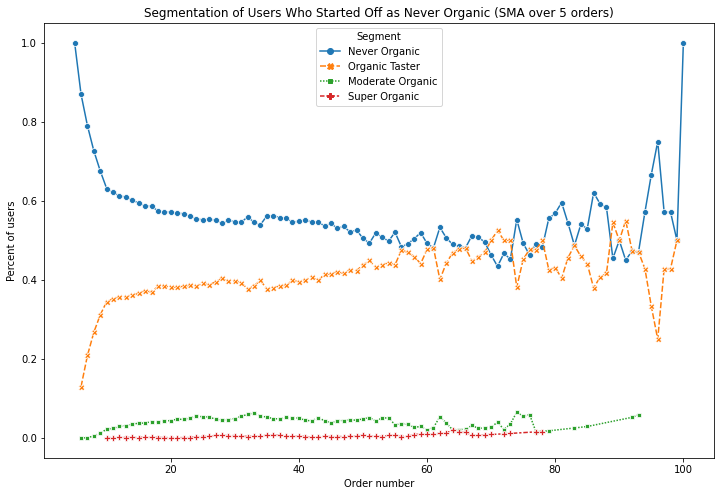

In [28]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_NO_SMA_plot_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Never Organic (SMA over 5 orders)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

What is the evolution of organic purchasing behavior of all users who at one point in time belonged to the Never Organic?

In [29]:
# Create a CMA dataset of all users who at one point in time where Never Organic

# List of users who at one point were Never Organic
any_NO_CMA_set = set(user_behavior10[user_behavior10['segment_CMA5'] == 'Never Organic']['user_id'])
any_NO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(any_NO_CMA_set)]

# Create a clean dataframe for plotting
any_NO_CMA_plot_df = any_NO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
any_NO_CMA_plot_df['%_users'] = any_NO_CMA_plot_df.users.div(any_NO_CMA_plot_df.order_number.map(any_NO_CMA_plot_df.groupby('order_number').sum().users))

any_NO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Never Organic,8464,0.754973
1,5,Organic Taster,2743,0.244670
2,5,Moderate Organic,4,0.000357
3,6,Never Organic,8253,0.736152
4,6,Organic Taster,2955,0.263580
5,6,Moderate Organic,3,0.000268
6,7,Never Organic,8065,0.719383
7,7,Organic Taster,3144,0.280439
8,7,Moderate Organic,2,0.000178
9,8,Never Organic,7957,0.709749


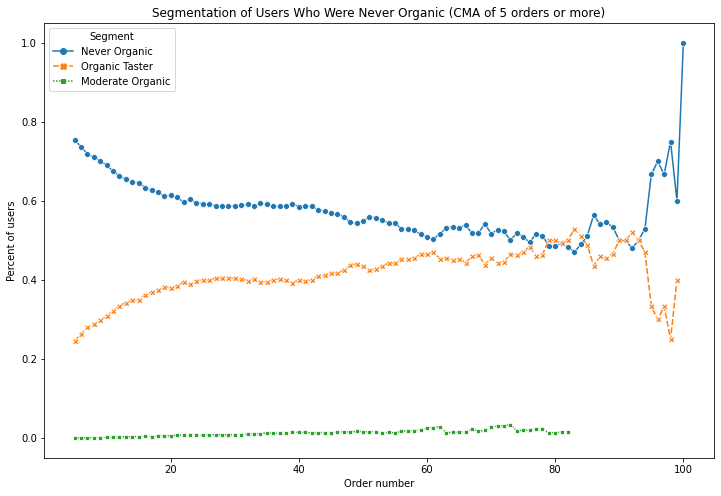

In [30]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=any_NO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Were Never Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Organic Taster
What is the evolution of organic purchasing behavior of users who started off as Organic Taster?

In [31]:
# Create a CMA dataset of users who started off as Organic Taster (order_number = 5)

# List of users who started off as Organic Taster by CMA
start_OT_CMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Organic Taster')]['user_id'].tolist()

start_OT_CMA_df = user_behavior10[user_behavior10['user_id'].isin(start_OT_CMA_list)]

# Create a clean dataframe for plotting
start_OT_CMA_plot_df = start_OT_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_OT_CMA_plot_df['%_users'] = start_OT_CMA_plot_df.users.div(start_OT_CMA_plot_df.order_number.map(start_OT_CMA_plot_df.groupby('order_number').sum().users))

start_OT_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Organic Taster,28025,1.000000
1,6,Organic Taster,25816,0.921178
2,6,Moderate Organic,1563,0.055772
3,6,Never Organic,646,0.023051
4,7,Organic Taster,25011,0.892453
5,7,Moderate Organic,2103,0.075040
6,7,Never Organic,911,0.032507
7,8,Organic Taster,24474,0.873292
8,8,Moderate Organic,2459,0.087743
9,8,Never Organic,1092,0.038965


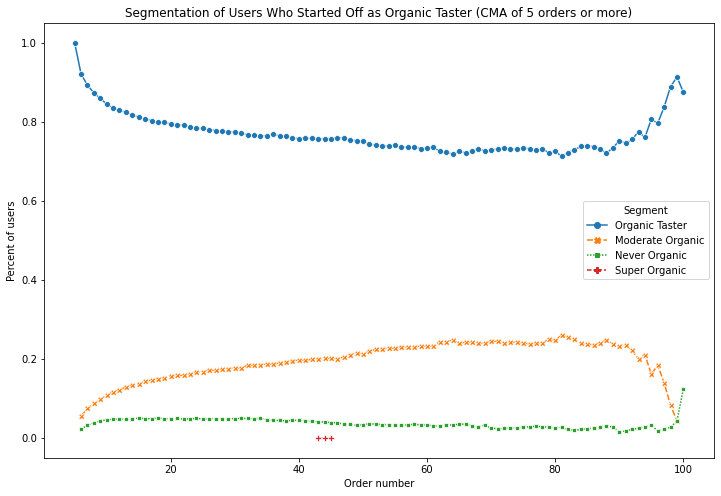

In [32]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_OT_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Organic Taster (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

In [33]:
# Create a SMA dataset of users who started off as Organic Taster (order_number = 5)

# List of users who started off as Organic Taster given SMA
start_OT_SMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_SMA5'] == 'Organic Taster')]['user_id'].tolist()

start_OT_SMA_df = user_behavior10[user_behavior10['user_id'].isin(start_OT_SMA_list)]

# Create a clean dataset for plotting
start_OT_SMA_plot_df = start_OT_SMA_df.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_OT_SMA_plot_df['%_users'] = start_OT_SMA_plot_df.users.div(start_OT_SMA_plot_df.order_number.map(start_OT_SMA_plot_df.groupby('order_number').sum().users))

start_OT_SMA_plot_df.head(15)

,order_number,segment_SMA5,users,%_users
0,5,Organic Taster,28025,1.000000
1,6,Organic Taster,24250,0.865299
2,6,Moderate Organic,2514,0.089706
3,6,Never Organic,1261,0.044996
4,7,Organic Taster,22137,0.789902
5,7,Moderate Organic,3869,0.138055
6,7,Never Organic,2015,0.071900
7,7,Super Organic,4,0.000143
8,8,Organic Taster,20640,0.736485
9,8,Moderate Organic,4809,0.171597


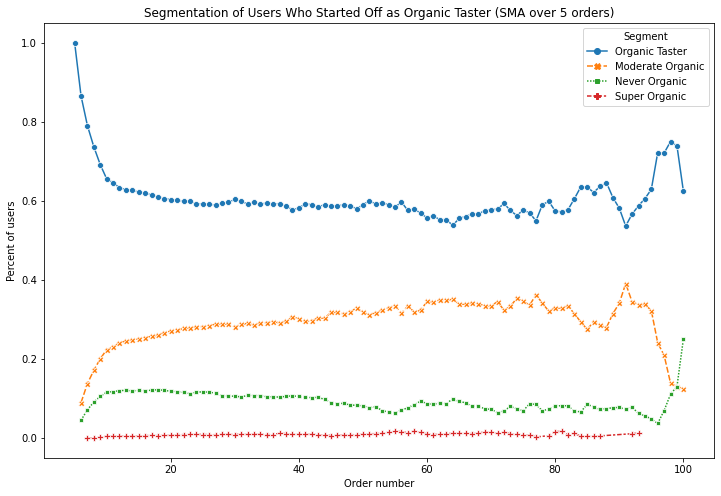

In [34]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_OT_SMA_plot_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Organic Taster (SMA over 5 orders)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

What is the evolution of organic purchasing behavior of all users who at one point in time belonged to the Organic Taster segment?

In [35]:
# Create a CMA dataset of all users who at one point in time where Organic Taster

# List of users who at one point were Organic Taster
any_OT_CMA_set = set(user_behavior10[user_behavior10['segment_CMA5'] == 'Organic Taster']['user_id'])
any_OT_CMA_df = user_behavior10[user_behavior10['user_id'].isin(any_OT_CMA_set)]

# Create a clean dataframe for plotting
any_OT_CMA_plot_df = any_OT_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
any_OT_CMA_plot_df['%_users'] = any_OT_CMA_plot_df.users.div(any_OT_CMA_plot_df.order_number.map(any_OT_CMA_plot_df.groupby('order_number').sum().users))

any_OT_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Organic Taster,28025,0.717798
1,5,Moderate Organic,7330,0.187742
2,5,Never Organic,3600,0.092206
3,5,Super Organic,88,0.002254
4,6,Organic Taster,28402,0.727454
5,6,Moderate Organic,7195,0.184284
6,6,Never Organic,3390,0.086827
7,6,Super Organic,56,0.001434
8,7,Organic Taster,28722,0.735650
9,7,Moderate Organic,7085,0.181467


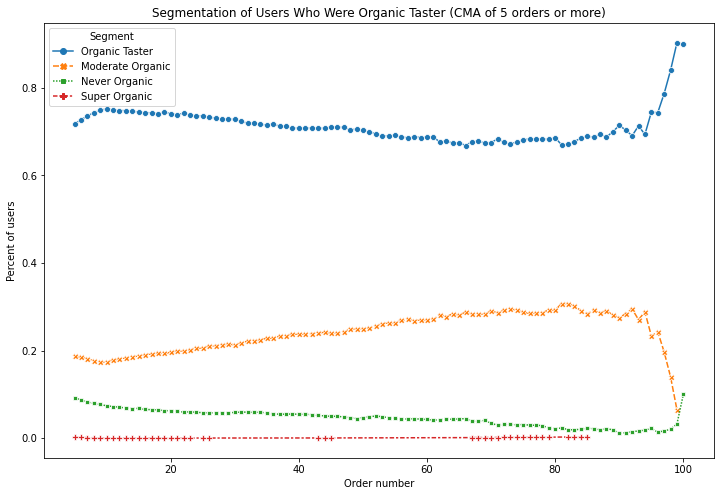

In [36]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=any_OT_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Were Organic Taster (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Moderate Organic
What is the evolution of organic purchasing behavior of users who started off as Moderate Organic?

In [37]:
# Create a CMA dataset of users who started off as Moderate Organic (order_number = 5)

# List of users who started off as Moderate Organic given CMA
start_MO_CMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Moderate Organic')]['user_id'].tolist()

start_MO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(start_MO_CMA_list)]

# Create a clean dataset for plotting
start_MO_CMA_plot_df = start_MO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_MO_CMA_plot_df['%_users'] = start_MO_CMA_plot_df.users.div(start_MO_CMA_plot_df.order_number.map(start_MO_CMA_plot_df.groupby('order_number').sum().users))

start_MO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Moderate Organic,37361,1.000000
1,6,Moderate Organic,35004,0.936913
2,6,Organic Taster,1730,0.046305
3,6,Super Organic,627,0.016782
4,7,Moderate Organic,34182,0.914911
5,7,Organic Taster,2401,0.064265
6,7,Super Organic,778,0.020824
7,8,Moderate Organic,33546,0.897888
8,8,Organic Taster,2959,0.079200
9,8,Super Organic,856,0.022912


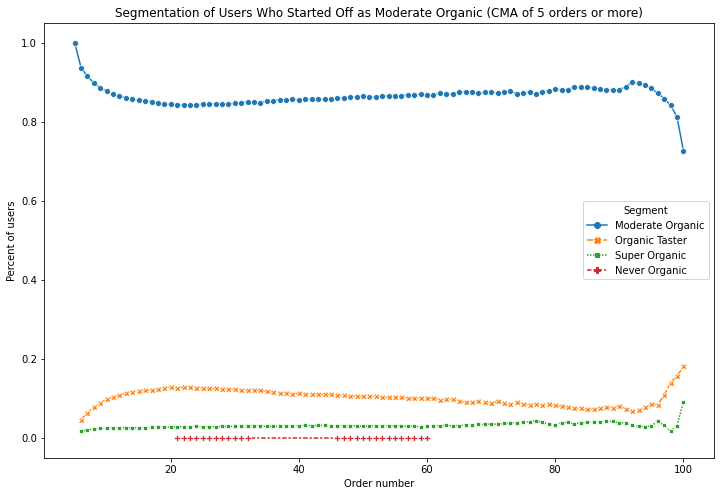

In [38]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_MO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Moderate Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

In [39]:
# Create a SMA dataset of users who started off as Moderate Organic (order_number = 5)

# List of users who started off as Moderate Organic given SMA
start_MO_SMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_SMA5'] == 'Moderate Organic')]['user_id'].tolist()

start_MO_SMA_df = user_behavior10[user_behavior10['user_id'].isin(start_MO_SMA_list)]

# Create a clean dataset for plotting
start_MO_SMA_plot_df = start_MO_SMA_df.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_MO_SMA_plot_df['%_users'] = start_MO_SMA_plot_df.users.div(start_MO_SMA_plot_df.order_number.map(start_MO_SMA_plot_df.groupby('order_number').sum().users))

start_MO_SMA_plot_df.head(15)

,order_number,segment_SMA5,users,%_users
0,5,Moderate Organic,37361,1.000000
1,6,Moderate Organic,33376,0.893338
2,6,Organic Taster,2604,0.069698
3,6,Super Organic,1381,0.036964
4,7,Moderate Organic,31316,0.838200
5,7,Organic Taster,4012,0.107385
6,7,Super Organic,2025,0.054201
7,7,Never Organic,8,0.000214
8,8,Moderate Organic,29725,0.795616
9,8,Organic Taster,5072,0.135757


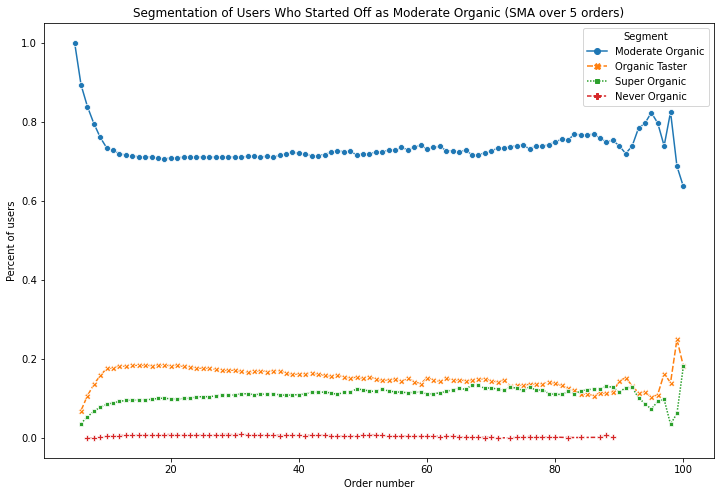

In [40]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_MO_SMA_plot_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Moderate Organic (SMA over 5 orders)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

What is the evolution of organic purchasing behavior of all users who at one point in time belonged to the Moderate Organic segment?

In [41]:
# Create a CMA dataset of all users who at one point in time where Moderate Organic

# List of users who at one point were Moderate Organic
any_MO_CMA_set = set(user_behavior10[user_behavior10['segment_CMA5'] == 'Moderate Organic']['user_id'])
any_MO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(any_MO_CMA_set)]

# Create a clean dataframe for plotting
any_MO_CMA_plot_df = any_MO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
any_MO_CMA_plot_df['%_users'] = any_MO_CMA_plot_df.users.div(any_MO_CMA_plot_df.order_number.map(any_MO_CMA_plot_df.groupby('order_number').sum().users))

any_MO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Moderate Organic,37361,0.780908
1,5,Organic Taster,6134,0.128211
2,5,Super Organic,4270,0.089250
3,5,Never Organic,78,0.001630
4,6,Moderate Organic,37613,0.786176
5,6,Organic Taster,6334,0.132391
6,6,Super Organic,3852,0.080513
7,6,Never Organic,44,0.000920
8,7,Moderate Organic,37812,0.790335
9,7,Organic Taster,6478,0.135401


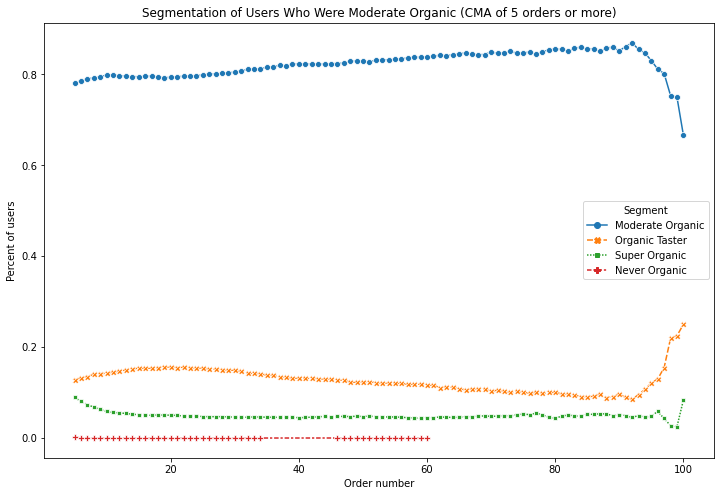

In [42]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=any_MO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Were Moderate Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

### Super Organic
What is the evolution of organic purchasing behavior of users who started off as Super Organic?

In [43]:
# Create a CMA dataset of users who started off as Super Organic (order_number = 5)

# List of users who started off as Super Organic given CMA
start_SO_CMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_CMA5'] == 'Super Organic')]['user_id'].tolist()

start_SO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(start_SO_CMA_list)]

# Create a clean dataset for plotting
start_SO_CMA_plot_df = start_SO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_SO_CMA_plot_df['%_users'] = start_SO_CMA_plot_df.users.div(start_SO_CMA_plot_df.order_number.map(start_SO_CMA_plot_df.groupby('order_number').sum().users))

start_SO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Super Organic,6609,1.000000
1,6,Super Organic,5564,0.841882
2,6,Moderate Organic,1045,0.158118
3,7,Super Organic,5082,0.768951
4,7,Moderate Organic,1526,0.230897
5,7,Organic Taster,1,0.000151
6,8,Super Organic,4728,0.715388
7,8,Moderate Organic,1877,0.284007
8,8,Organic Taster,4,0.000605
9,9,Super Organic,4447,0.672870


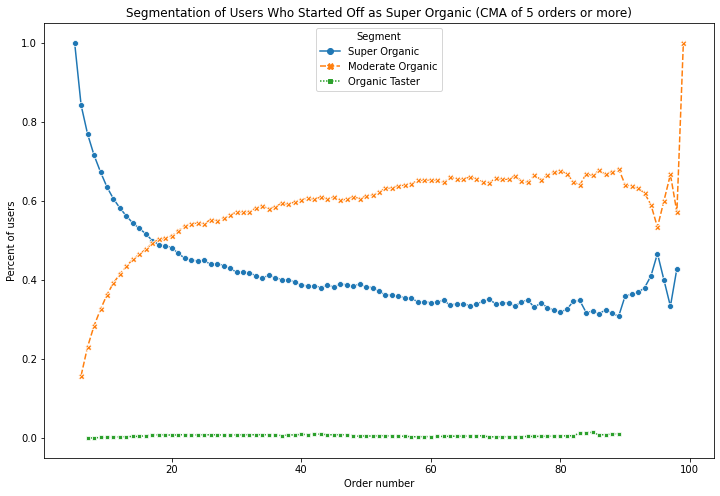

In [44]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_SO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Super Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

In [45]:
# Create a SMA dataset of users who started off as Super Organic (order_number = 5)

# List of users who started off as Super Organic given SMA
start_SO_SMA_list = user_behavior10[(user_behavior10['order_number'] == 5) & 
                            (user_behavior10['segment_SMA5'] == 'Super Organic')]['user_id'].tolist()

start_SO_SMA_df = user_behavior10[user_behavior10['user_id'].isin(start_SO_SMA_list)]

# Create a clean dataset for plotting
start_SO_SMA_plot_df = start_SO_SMA_df.groupby('order_number')['segment_SMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
start_SO_SMA_plot_df['%_users'] = start_SO_SMA_plot_df.users.div(start_SO_SMA_plot_df.order_number.map(start_SO_SMA_plot_df.groupby('order_number').sum().users))

start_SO_SMA_plot_df.head(15)

,order_number,segment_SMA5,users,%_users
0,5,Super Organic,6609,1.000000
1,6,Super Organic,5307,0.802996
2,6,Moderate Organic,1302,0.197004
3,7,Super Organic,4665,0.705856
4,7,Moderate Organic,1935,0.292783
5,7,Organic Taster,9,0.001362
6,8,Super Organic,4097,0.619912
7,8,Moderate Organic,2479,0.375095
8,8,Organic Taster,33,0.004993
9,9,Super Organic,3668,0.555001


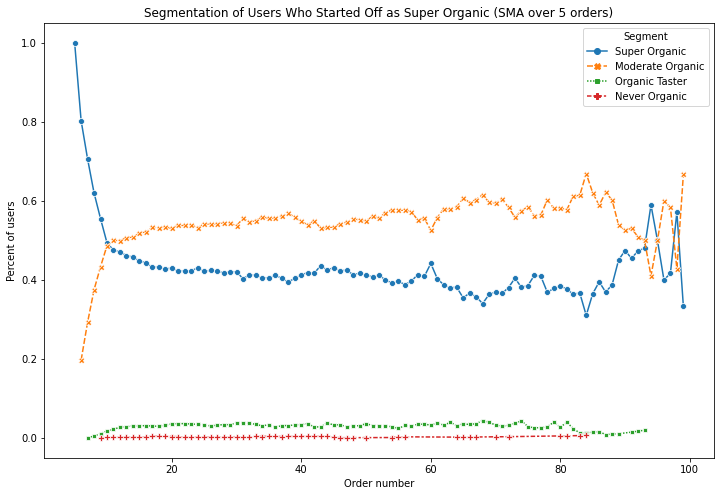

In [46]:
# Plot the percentage of users per order separated into the segments by a simple moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=start_SO_SMA_plot_df, x="order_number", y = '%_users', hue="segment_SMA5", style='segment_SMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Started Off as Super Organic (SMA over 5 orders)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass

What is the evolution of organic purchasing behavior of all users who at one point in time belonged to the Super Organic segment?

In [47]:
# Create a CMA dataset of all users who at one point in time where Super Organic

# List of users who at one point were Super Organic
any_SO_CMA_set = set(user_behavior10[user_behavior10['segment_CMA5'] == 'Super Organic']['user_id'])
any_SO_CMA_df = user_behavior10[user_behavior10['user_id'].isin(any_SO_CMA_set)]

# Create a clean dataframe for plotting
any_SO_CMA_plot_df = any_SO_CMA_df.groupby('order_number')['segment_CMA5'].value_counts().to_frame(name = 'users').reset_index()

# Calculate the percentage of users per segment
any_SO_CMA_plot_df['%_users'] = any_SO_CMA_plot_df.users.div(any_SO_CMA_plot_df.order_number.map(any_SO_CMA_plot_df.groupby('order_number').sum().users))

any_SO_CMA_plot_df.head(15)

,order_number,segment_CMA5,users,%_users
0,5,Super Organic,6609,0.739593
1,5,Moderate Organic,2326,0.260295
2,5,Organic Taster,1,0.000112
3,6,Super Organic,6191,0.692816
4,6,Moderate Organic,2743,0.306961
5,6,Organic Taster,2,0.000224
6,7,Super Organic,5860,0.655774
7,7,Moderate Organic,3074,0.344002
8,7,Organic Taster,2,0.000224
9,8,Super Organic,5584,0.624888


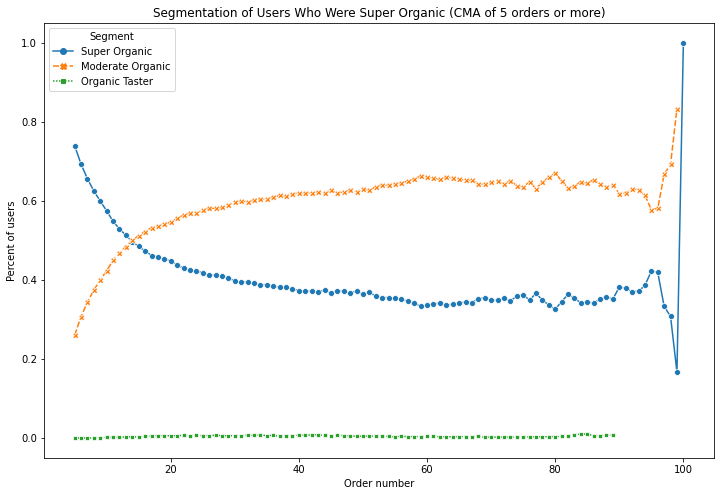

In [48]:
# Plot the percentage of users per order separated into the segments by a culmulative moving average
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(data=any_SO_CMA_plot_df, x="order_number", y = '%_users', hue="segment_CMA5", style='segment_CMA5', 
             markers=True, ax = ax)

ax.legend().set_title('Segment')
ax.set_title('Segmentation of Users Who Were Super Organic (CMA of 5 orders or more)')
ax.set_xlabel('Order number')
ax.set_ylabel('Percent of users')
pass